# MAIS 202 Winter 2022 Coding Exercise

## Instructions
 **Make a copy** of this notebook into your personal Google Drive account and
**make sure that this notebook is made public** by 11:59 pm, January 14th, 2022 in order to be evaluated. **Kindly attempt all 3 questions.**

**Please only submit work that is your OWN. We will be using plagiarism detection software (MOSS) to compare your code against all other submissions and submissions from past years and you will be automatically disqualified if any plagiarism is detected**

If you have any questions regarding this challenge, please reach out to us through our [Facebook Page](https://www.facebook.com/McGillAI/). 

## Questions
* [Part 1](#scrollTo=QYskRrWJEwZH)
* [Part 2 Task 1](#scrollTo=yl9IKD31K-J0)
* [Part 2 Task 2](#scrollTo=t_xY3228qPmP)
* [Part 2 Task 3](#scrollTo=ePnI_4kIV1Zb)

## Part 1

This part asks you to analyze a dataset using libraries.
To learn more about movies grosses, we have provided you with two csv's: `movies_data.csv` and `genre_data.csv`.
The urls to the files are
```
https://raw.githubusercontent.com/williamykzhang/MAIS_CE/master/genre_data.csv
```
and
```
https://raw.githubusercontent.com/williamykzhang/MAIS_CE/master/movies_data.csv
```
The file `movies_data.csv` contains information about movies such as their title, imdb rating, length, rank, rating, studio, worldwide gross, and year in a comma separated format as shown below.
![CSV example 1](https://user-images.githubusercontent.com/10730760/71313653-b9478880-2409-11ea-8745-a58909dcbd0f.png)

The file `genre_data.csv` contains the genre for each movie in the `movies_data.csv` file, as shown below.
![CSV example 2](https://user-images.githubusercontent.com/10730760/71313662-d3816680-2409-11ea-94c7-6795663ef8e3.png)

# Question 1

1. In the provided cell, load the datasets from their urls, parse the information and determine the average IMDB rating for each of the genres using the **pandas** library. https://pandas.pydata.org/.
2. Plot the results onto a graph using the pyplot module of the **matplotlib** library. https://matplotlib.org/.

**Note.** You are not allowed to use other libraries, and you are required to write all the code in the following cell. You are also not allowed to run bash commands. You must use the libraries we ask you to use.



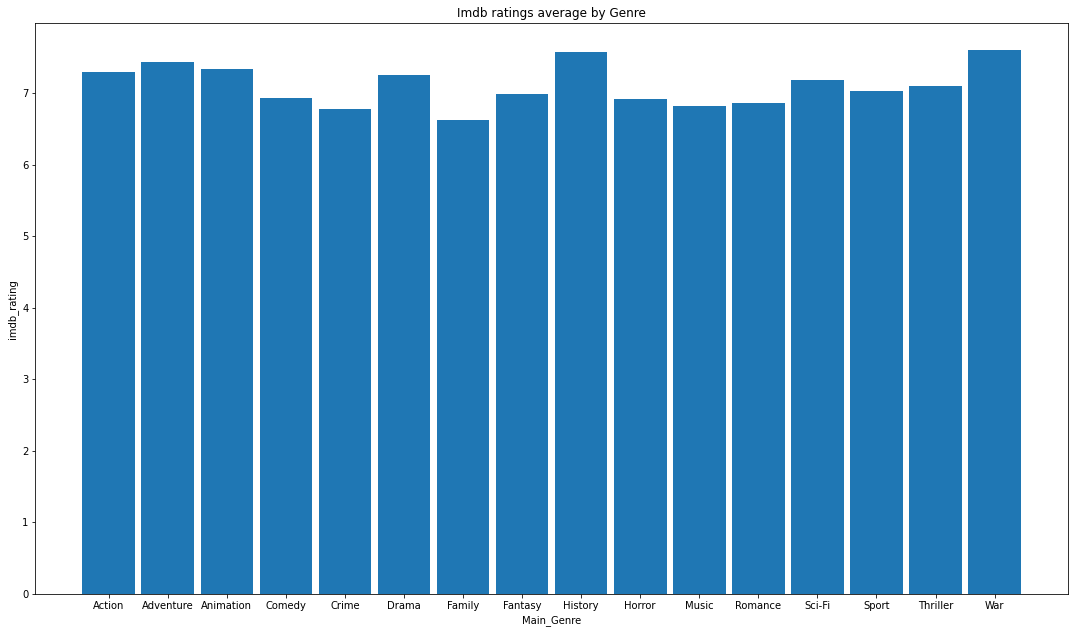

In [12]:
##############################################################
#                                                            #
#  Please write all of your code for this question in this cell 
#                                                            #
##############################################################

##############################################################
#                                                            #
#  Question 1-1
#                                                            #
##############################################################

import pandas as pd
genre_data = pd.read_csv('https://raw.githubusercontent.com/williamykzhang/MAIS_CE/master/genre_data.csv')
movies_data = pd.read_csv ('https://raw.githubusercontent.com/williamykzhang/MAIS_CE/master/movies_data.csv')


  #*--1--*****Merge Join
#data_merge = pd.merge( movies_data, genre_data , on='title')
data_merge = pd.merge( movies_data, genre_data , left_on='title', right_on='title', how='outer' , indicator=True, left_index=True)
data_merge.loc[:,  ['title','Main_Genre']]
another_data = data_merge.loc[:,  ['title','Main_Genre','imdb_rating']]
another_data = another_data.groupby('Main_Genre').mean().reset_index()
another_data


######### Question 1-1 Completed Above--#####################

##############################################################
#                                                            #
#  Question 1-2
#                                                            #
##############################################################


  #*--Plot result--*****Merge Join
import matplotlib.pyplot as plt
# #plt.plot()
genre_x_axis = []
genre_y_axis = []
main_x_axis =  []
main_y_axis =  []



#  To find the rating
for (x, y) in another_data['imdb_rating'].iteritems():
  genre_x_axis.append(x)
  genre_y_axis.append(y)

#  To find the genre
for (x, y) in another_data['Main_Genre'].iteritems():
  main_x_axis.append(x)
  main_y_axis.append(y)




fig, ax = plt.subplots()
ax.bar(main_y_axis, genre_y_axis, width= 0.89)
ax.set_xlabel('Main_Genre')
ax.set_ylabel('imdb_rating')
ax.set_title('Imdb ratings average by Genre')
ax.set_facecolor('white')
#ax.legend()


fig.savefig('imdb_rating_by_genre.png', dpi=80)
fig.set_size_inches(18.5, 10.5, forward=True)

#plt.show()


















The output of the cell should be similar to the results shown below.

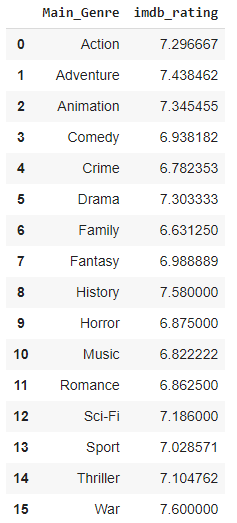
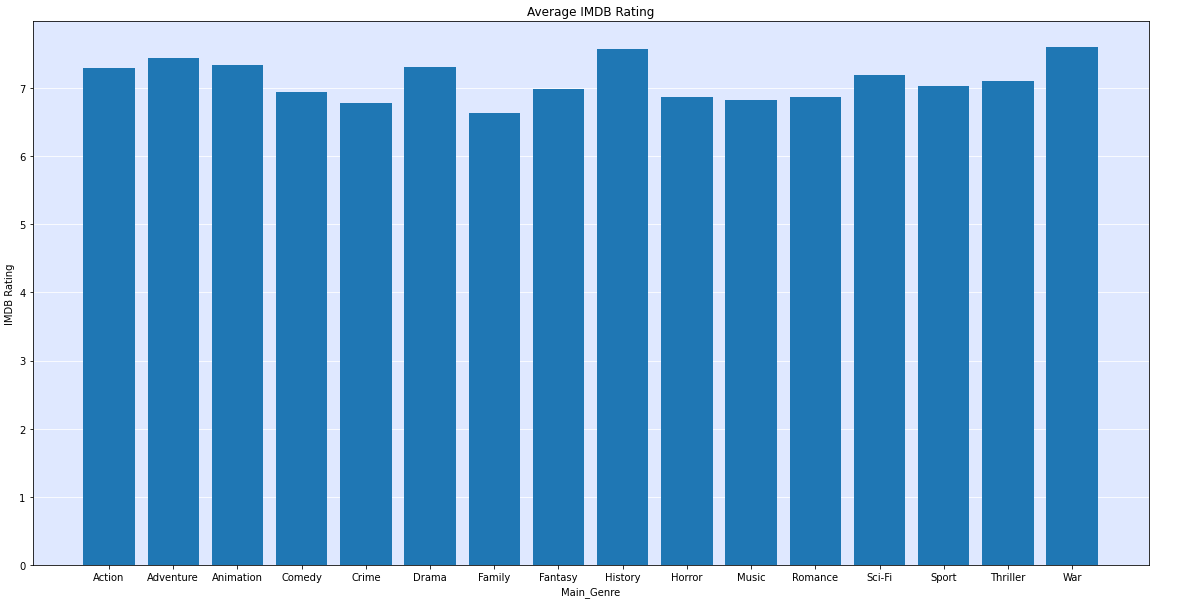

# Question 2

1. In the provided cell, using the same dataset and the **pandas** library, parse the information and display the number of movies in the dataset which have each rating (G, PG, PG-13, etc.). https://pandas.pydata.org/.
2. Plot the results onto a graph again using the pyplot module of the **matplotlib** library. https://matplotlib.org/.

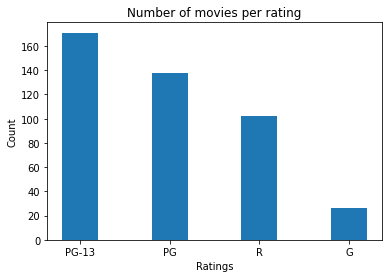

In [14]:
##############################################################
#                                                            #
#  Please write all of your code for this question in this cell 
#                                                            #
##############################################################



##############################################################
#                                                            #
#  Question 2-1  count number of movies group by for each rating type
#                                                            #
##############################################################

import pandas as pd
genre_data = pd.read_csv('https://raw.githubusercontent.com/williamykzhang/MAIS_CE/master/genre_data.csv')
movies_data = pd.read_csv ('https://raw.githubusercontent.com/williamykzhang/MAIS_CE/master/movies_data.csv')


df = movies_data.loc[:,  ['rating' , 'title']]
df = df.groupby('rating').count().reset_index()
df = df.sort_values(by = 'title', ascending= False)


##############################################################
#                                                            #
#  Question 2-2  count number of movies group by for each rating type
#                                                            #
##############################################################





#   #*--Plot result--*****Merge Join
import matplotlib.pyplot as plt
# # #plt.plot()

rating_x_axis = []
rating_y_axis = []
count_x_axis =  []
count_y_axis =  []



# #  To find the rating
for (x, y) in df['rating'].iteritems():
  rating_x_axis.append(x)
  rating_y_axis.append(y)

# #  To find the count
for (x, y) in df['title'].iteritems():
  count_x_axis.append(x)
  count_y_axis.append(y)






fig, ax = plt.subplots()
ax.bar(rating_y_axis, count_y_axis, width= 0.4)
ax.set_ylabel('Count')
ax.set_xlabel('Ratings')
ax.set_title('Number of movies per rating')
ax.set_facecolor('white')




The output of the cell should be similar to the results shown below:

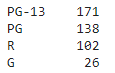

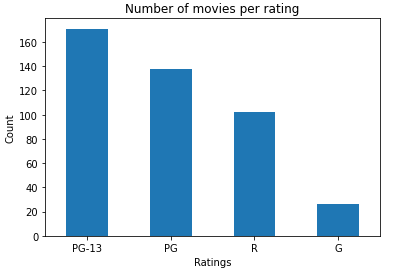

## Part 2

For the second half of the coding challenge, you are not allowed to use libraries.
More specifically, you are not allowed to use imported code from the standard library nor from external libraries.

### First Task

Your first task is to write a helper function `to_grade_point` which converts a grade out of 100 into a `tuple` whose first entry is a string representing the letter grade and whose second entry is a float representing the Grade Points.


![Letter Grade Table](https://i.ibb.co/WnvbXL1/table.png)


**Note.** Inputs are assumed to be valid. That is, inputs will be integers from 0 to 100 inclusive.

In [ ]:
##############################################################
#                                                            #
#  Please write all of your code for this task in this cell  #
#                                                            #
##############################################################


df = pd.DataFrame({'points': ('0.0', '2.3','2.7', '3.0','3.3', '3.7', '4.0'),
                  'letter': ('A+' ,'A', 'A-', 'B+', 'B', 'B-', 'C+', 'F' ),
                   'scale':(s1 = list(range(85,101)), s2 = list(range(80,85)) , s3 =list(range(75,80)),
                            s4 =list(range(70,75)), s5 list(range(65,70)), s6 =list(range(60,65)) ,s7 =  list(range(0,60)),  
                     )
                    
 
              })



def to_grade_point(note):
  try:
    grade = int(input('What is your grade out of 100'))
    while bust:
      if grade > 100:
        print('Please provide a grade between 0 and 100 ')
        bust = False
        break
      else:
        if grade in  

        print('                                ')
        print('                                ')
        print(player_1)
        
        
    except:
          print('please provide a grade from 0 to 100')

You can test your code with the following snippet.
If your code is correct, you should see

![Example Code 1](https://i.ibb.co/4F9mP9Y/code1.png)

In [17]:
# for grade in [0, 99, 80, 85, 84, 60, 59, 74]:
#   print("{} -> {}".format(grade, to_grade_point(grade)))


df = pd.DataFrame({'points': ('0.0', '2.3','2.7', '3.0','3.3', '3.7', '4.0'),
                  'letter': ('A+' ,'A', 'A-', 'B+', 'B', 'B-', 'C+', 'F' ),
                   s1 = list(range(85,101))
                   s2 = list(range(80,85))
                   s2 = list(range(80,85))
                   s3 =list(range(75,80))
                   s4 =list(range(70,75))
                   s5 list(range(65,70))
                   s6 =list(range(60,65))
                   s7 =  list(range(0,60))
                   'scale':(,  , ,
                            , ,  ,, 
                    
                     )
                    
 
              })

SyntaxError: ignored

### Second Task

Your second task is to write a class named `GradeRecords` with a certain specification.
This part will use the helper function defined in the first part so make sure to do that first.

A `GradeRecords` object has the following attributes:
* `term`, a string representing the current semester;
* `grades`, a `list` object containing `tuples`, where the first entry of each tuple is a string representing the code of the class, the second entry of each tuple is the grade out of 100, and the third entry is the number of credits for this course. `grades` can be initialized (see below) as an empty list.
* `num_courses` an `int` which contains the number of courses in the record. This can be initialized as 0.


**Note.** You are not allowed to add more attributes.

Furthermore, a `GradeRecords` object has the following methods:
* an initialization method which takes as input the current term and initializes the three attributes;
* `add_course`, a method which takes a string representing the course code, an int for the grade out of 100 and the number of credits. The method adds a new tuple to `grades`.
* `get_best_courses`, a method which takes no parameters and outputs a list of course codes with the best grades. For instance, if the best grade is a 'B', it will output all course codes with a 'B', i.e. all courses codes with a grade between 70 and 74 (inclusive). You are required to use the helper function defined in the first part.
* `get_GPA`, a method which outputs the Grade Point Average for the semester, assuming all classes all weighted by the number of credits. You are required to use the helper function from the first task. Round it to one decimal place.
* `to_dict`, a method which returns a dict whose keys are the class codes and whose corresponding values are the letter grades. Once again, you must use the helper function from the first task.

**Note.** All inputs are assumed to be valid. Particularly, you may assume there won't be duplicate class codes.

In [ ]:
##############################################################
#                                                            #
#  Please write all of your code for this task in this cell  #
#                                                            #
##############################################################

You can test your code with the following snippet. If your code is correct you should see

![code example 2](https://i.ibb.co/xCPCWyy/code2.png)

In [ ]:
gr = GradeRecords("Fall 2019")
print("First batch")
print("Term: {}".format(gr.term))

gr.add_course("COMP 202", 83, 3)
gr.add_course("CLAS 203", 75, 3)
gr.add_course("LING 360", 81, 3)

print("Number of courses: {}".format(gr.num_courses))
print("Best courses: {}".format(gr.get_best_courses()))
print("GPA: {}".format(gr.get_GPA()))
print("Dictionary: {}".format(gr.to_dict()))

print() 

print("Second batch")
print("Term: {}".format(gr.term))

gr.add_course("COMP 551", 67, 4)
gr.add_course("HIST 318", 88, 3)

print("Number of courses: {}".format(gr.num_courses))
print("Best courses: {}".format(gr.get_best_courses()))
print("GPA: {}".format(gr.get_GPA()))
print("Dictionary: {}".format(gr.to_dict()))

### Third Task


> 






For the third task, please complete the following function that multiplies two matrices. Usage of any other libraries containing functions that perform matrix multiplication (including but not limited to numpy) is NOT allowed.

In [ ]:
def matrix_mult(x,y):
    
    #make sure the shapes match so we can perform matrix multiplication
    assert len(x[0]) == len(y)
    
    #create the result with the correct shape
    result = [[0 for j in range(len(y[0]))] for i in range(len(x))]
    
    #TODO: multiply x and y
    #hint: use nested loops


    return result

Run the following block to check if your implementation is correct

In [ ]:
x = [[1,2],[3,4]]
y = [[1,2],[3,4]]
assert [[7,10],[15,22]] == matrix_mult(x,y)
x = [[1,2,3],[3,4,5]]
y = [[1,2],[3,4],[5,6]]
assert [[22,28],[40,52]] == matrix_mult(x,y)
